In [1]:
import requests
import time
import json
arr = []
end_cursor = '' # empty for the 1st page
tag = 'fruita' # hastag goes here - set up to take a list of hashtags for future iterations
page_count = 5 # adjust var for desired num of pages
for i in range(0, page_count):
    url = "https://www.instagram.com/explore/tags/{0}/?__a=1&max_id={1}".format(tag, end_cursor)
    r = requests.get(url)
    data = json.loads(r.text)
    
    end_cursor = data['graphql']['hashtag']['edge_hashtag_to_media']['page_info']['end_cursor'] # value for the next page
    edges = data['graphql']['hashtag']['edge_hashtag_to_media']['edges'] # list with posts
    
    for item in edges:
       arr.append(item['node'])
    time.sleep(2) # time limit insurance
print(end_cursor) # save this to restart parsing with the next page
with open('insta_posts.json', 'w') as outfile:
    json.dump(arr, outfile) # save to json

QVFEdFJQZ1BSeEwydGFIQmlFdjlYLVlxNURIeDBPclRZaTRFUVdIUkxLdEpWYlBzck1UWFIzeGJUZ1EtYVdIRWh5dFhuZ1ZLNFJ4VjlsS0dNTi13T09tVw==


In [2]:
with open('insta_posts.json', 'r') as f:
    arr = json.loads(f.read()) # load json data from previous step
locations = []
for item in arr:
    shortcode = item['shortcode']
    url = "https://www.instagram.com/p/{0}/?__a=1".format(shortcode)
    
    r = requests.get(url)
    data = json.loads(r.text)
    try:
        location = data['graphql']['shortcode_media']['location'] # get location data for a post

    except:
         location = '' 
    locations.append({'shortcode': shortcode, 'location': location})
with open('location_data.json', 'w') as outfile:
    json.dump(locations, outfile) # save to json
    

In [3]:
# everything below this point is experimental everything above works as expected:
import pandas as pd 
post_data = pd.read_json('/Users/nathanthomas/personal_projects/geo/insta_scrape/insta_posts.json')
post_data.head()


,comments_disabled,__typename,id,edge_media_to_caption,shortcode,edge_media_to_comment,taken_at_timestamp,dimensions,display_url,edge_liked_by,edge_media_preview_like,owner,thumbnail_src,thumbnail_resources,is_video,accessibility_caption,product_type,video_view_count
0,False,GraphImage,2295597859867608576,{'edges': [{'node': {'text': 'Stay at home ord...,B_bmhdIjkW9,{'count': 0},1587876611,"{'height': 810, 'width': 1080}",https://instagram.fapa1-1.fna.fbcdn.net/v/t51....,{'count': 9},{'count': 9},{'id': '1552409195'},https://instagram.fapa1-1.fna.fbcdn.net/v/t51....,[{'src': 'https://instagram.fapa1-1.fna.fbcdn....,False,"Photo by Marty Stevens in Mary's Loop Fruita, ...",NaN,NaN
1,False,GraphImage,2295559769748889088,{'edges': [{'node': {'text': '#fruita'}}]},B_bd3K8j15Y,{'count': 0},1587872070,"{'height': 1350, 'width': 1080}",https://instagram.fapa1-2.fna.fbcdn.net/v/t51....,{'count': 6},{'count': 6},{'id': '3575797925'},https://instagram.fapa1-2.fna.fbcdn.net/v/t51....,[{'src': 'https://instagram.fapa1-2.fna.fbcdn....,False,"Photo by Yanina Dobarro on April 25, 2020. Ima...",NaN,NaN
2,False,GraphImage,2295512280145026816,{'edges': [{'node': {'text': 'Checking out @sa...,B_bTEGzl16t,{'count': 6},1587866409,"{'height': 810, 'width': 1080}",https://instagram.fapa1-1.fna.fbcdn.net/v/t51....,{'count': 100},{'count': 100},{'id': '22424098'},https://instagram.fapa1-1.fna.fbcdn.net/v/t51....,[{'src': 'https://instagram.fapa1-1.fna.fbcdn....,False,Photo by 🚲C O N O R M U L L E R V Y🚲 in Frui...,NaN,NaN
3,False,GraphSidecar,2295489812886432512,{'edges': [{'node': {'text': 'What a fantastic...,B_bN9Kin6qq,{'count': 5},1587863731,"{'height': 820, 'width': 1080}",https://instagram.fapa1-1.fna.fbcdn.net/v/t51....,{'count': 20},{'count': 20},{'id': '607586266'},https://instagram.fapa1-1.fna.fbcdn.net/v/t51....,[{'src': 'https://instagram.fapa1-1.fna.fbcdn....,False,"Photo by AuroraQueen on April 25, 2020. Image ...",NaN,NaN
4,False,GraphImage,2295453628112371712,{'edges': [{'node': {'text': 'Strawberry may n...,B_bFum2BQB3,{'count': 0},1587859417,"{'height': 1152, 'width': 1080}",https://instagram.fapa1-1.fna.fbcdn.net/v/t51....,{'count': 8},{'count': 8},{'id': '4222650607'},https://instagram.fapa1-1.fna.fbcdn.net/v/t51....,[{'src': 'https://instagram.fapa1-1.fna.fbcdn....,False,"Photo by Muhammd Mudassir on April 25, 2020. I...",NaN,NaN


In [4]:
location_data = pd.read_json('/Users/nathanthomas/personal_projects/geo/insta_scrape/location_data.json')
location_data.head()

,shortcode,location
0,B_bmhdIjkW9,"{'id': '545239353', 'has_public_page': True, '..."
1,B_bd3K8j15Y,None
2,B_bTEGzl16t,"{'id': '236675923', 'has_public_page': True, '..."
3,B_bN9Kin6qq,None
4,B_bFum2BQB3,None


In [26]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
import datetime as dt

post_dates = post_data.taken_at_timestamp

converted_post_dates = []
# 2017 = []
d_2018 = []
d_2019 = []
d_2020 = []

for d in post_dates: 
    converted_post_dates.append(dt.datetime.fromtimestamp(d).strftime('%Y-%m-%d %H:%M:%S'))
    
# post_dates_df = pd.DataFrame(converted_post_dates)
# post_dates_df.head()
# ^^ how to convert a list to a dataframe

for date in converted_post_dates: 
    if '2018' in date: 
        d_2018.append(date)
    if '2019' in date: 
        d_2019.append(date)
    if '2020' in date: 
        d_2020.append(date)

# converted_post_dates[1]

print(d_2020)


['2020-04-25 22:50:11', '2020-04-25 21:34:30', '2020-04-25 20:00:09', '2020-04-25 19:15:31', '2020-04-25 18:03:37', '2020-04-25 18:00:48', '2020-04-25 17:30:58', '2020-04-25 17:29:20', '2020-04-25 17:24:27', '2020-04-25 17:12:01', '2020-04-25 16:32:19', '2020-04-25 15:40:48', '2020-04-25 14:41:52', '2020-04-25 13:46:46', '2020-04-25 12:03:44', '2020-04-25 11:18:04', '2020-04-25 10:52:48', '2020-04-25 10:51:21', '2020-04-25 10:31:53', '2020-04-25 10:01:19', '2020-04-25 09:30:14', '2020-04-25 09:27:40', '2020-04-25 09:21:57', '2020-04-25 09:17:17', '2020-04-25 08:53:16', '2020-04-25 08:38:17', '2020-04-25 08:15:11', '2020-04-25 08:09:14', '2020-04-25 07:54:08', '2020-04-25 07:44:14', '2020-04-25 07:38:31', '2020-04-25 07:10:37', '2020-04-25 06:58:38', '2020-04-25 06:32:10', '2020-04-25 05:33:26', '2020-04-25 03:54:51', '2020-04-25 03:42:49', '2020-04-25 03:28:10', '2020-04-25 03:25:22', '2020-04-25 03:14:15', '2020-04-25 02:37:39', '2020-04-25 02:35:15', '2020-04-25 02:07:58', '2020-04-2

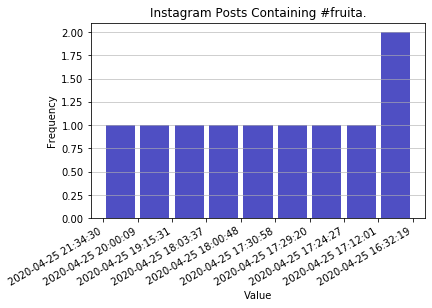

In [7]:
import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

fig, ax = plt.subplots()

plt.hist(x=converted_post_dates, bins=[1,2,3,4,5,6,7,8,9,10], color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(f"Instagram Posts Containing #{tag}.")
fig.autofmt_xdate()


# ax.xaxis.set_major_locator(MultipleLocator(20))
# # ax.xaxis.set_major_locator()
# ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

# # For the minor ticks, use no labels; default NullFormatter.
# ax.xaxis.set_minor_locator(MultipleLocator(5))

# # ax.set_xlim(converted_post_dates[0], converted_post_dates[-1])




# locator = mdates.DayLocator(bymonthday=[1, 15])
# formatter = mdates.DateFormatter('%b %d')

# fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
# ax.xaxis.set_major_locator(locator)
# ax.xaxis.set_major_formatter(formatter)
# ax.plot(time, y1)
# ax.tick_params(axis='x', rotation=70)
# plt.show()

# mplp.text(23, 45, r'$\mu=15, b=3$')
# maxfreq = n.max()
# Set a clean upper y-axis limit.
# mplp.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

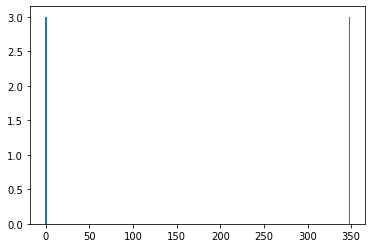

In [36]:
from matplotlib.pyplot import *


x = [len(d_2018), len(d_2019), len(d_2020)]
y_range = len(x)
y = y_range
bar(x,y)
show()